# Goal
The goal of this notebook is to explore the several data sets

In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(240,240,240,0.5)'
    )

from utils import plot_functions, plot_graph

# Data import

In [17]:
df_holidays = pd.read_csv('./data/holidays_events.csv')
df_oil = pd.read_csv('./data/oil.csv')
df_stores = pd.read_csv('./data/stores.csv')
df_transactions = pd.read_csv('./data/transactions.csv')
df_train = pd.read_csv("./data/train.csv")

In [18]:
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [19]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [20]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [21]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [22]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


# Visualizing time series

grouped sales

In [23]:
df_group_sales = df_train.groupby("date", as_index= False)['sales'].sum()

In [24]:
df_holi = df_holidays[df_holidays["type"] == "Holiday"]
df_holi.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [25]:
df_holidays.locale.unique()

array(['Local', 'Regional', 'National'], dtype=object)

### Ploting sales per day

In [26]:
from utils import plot_graph
df_holi = df_holidays[(df_holidays["type"] == "Holiday") & (df_holidays["locale"] == "National")]

plot_graph.plot_time_serie(graph_data=df_group_sales,
                           time_axis= "date",
                           y_axis="sales",
                           graph_title="sales time serie with holiday flag",
                           df_bar= df_holi,
                           time_axis_df_bar= "date",
                           )

### Ploting transaction per day

In [27]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [28]:
df_stores[df_stores['store_nbr'] == 1]

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13


In [29]:
df_holidays[df_holidays['locale_name'] == "Quito"].drop_duplicates()

,date,type,locale,locale_name,description,transferred
28,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
29,2012-12-06,Holiday,Local,Quito,Fundacion de Quito,False
81,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
82,2013-12-06,Holiday,Local,Quito,Fundacion de Quito,False
146,2014-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
147,2014-12-06,Holiday,Local,Quito,Fundacion de Quito,False
200,2015-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
201,2015-12-06,Holiday,Local,Quito,Fundacion de Quito,False
286,2016-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
287,2016-12-06,Holiday,Local,Quito,Fundacion de Quito,False


In [30]:
plot_graph.plot_time_serie(graph_data=df_transactions[df_transactions["store_nbr"] == 1],
                           time_axis= "date",
                           y_axis="transactions",
                           graph_title="transaction per day",
                           df_bar= df_holidays[df_holidays['locale_name'] == "Quito"].drop_duplicates(),
                           time_axis_df_bar= "date",
                           )

In [31]:
df_train.groupby('date', as_index= False)["sales"].sum()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1679,2017-08-11,826373.722022
1680,2017-08-12,792630.535079
1681,2017-08-13,865639.677471
1682,2017-08-14,760922.406081


In [32]:
df_test = df_transactions.groupby('date', as_index=False)['transactions'].sum().merge(df_train.groupby('date', as_index= False)["sales"].sum())

### Ploting Oil TS

In [33]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [34]:
plot_graph.plot_time_serie(graph_data=df_oil,
                           time_axis= "date",
                           y_axis="dcoilwtico",
                           graph_title="Oil market",
                           df_bar= None,
                           time_axis_df_bar= "date",
                           )

## Focus on holidays

In [35]:
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [36]:
df_holidays.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [37]:
df_holidays[df_holidays["type"] == "Holiday"]

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
338,2017-11-12,Holiday,Local,Ambato,Independencia de Ambato,False
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False


In [38]:
df_holidays[df_holidays["transferred"]]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [39]:
df_holidays[df_holidays["description"] == "Independencia de Guayaquil"]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
190,2015-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False
274,2016-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False
331,2017-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False


In [40]:
df_holidays[df_holidays["date"] == "2012-10-12"]

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False


## Store analysis

In [41]:
df_store_transaction = df_stores.merge(df_transactions)
df_store_transaction

,store_nbr,city,state,type,cluster,date,transactions
0,1,Quito,Pichincha,D,13,2013-01-02,2111
1,1,Quito,Pichincha,D,13,2013-01-03,1833
2,1,Quito,Pichincha,D,13,2013-01-04,1863
3,1,Quito,Pichincha,D,13,2013-01-05,1509
4,1,Quito,Pichincha,D,13,2013-01-06,520
...,...,...,...,...,...,...,...
83483,54,El Carmen,Manabi,C,3,2017-08-11,768
83484,54,El Carmen,Manabi,C,3,2017-08-12,903
83485,54,El Carmen,Manabi,C,3,2017-08-13,1054
83486,54,El Carmen,Manabi,C,3,2017-08-14,818


In [42]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [43]:
df_stores.type.unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [44]:
df_stores[df_stores['type'] == "A"]

,store_nbr,city,state,type,cluster
43,44,Quito,Pichincha,A,5
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11


In [45]:
df_stores.cluster.unique()

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17])

In [46]:
df_stores.cluster.value_counts().reset_index().sort_values(by = "count").merge(
   df_stores[["type", "cluster"]].drop_duplicates()
)

,cluster,count,type
0,5,1,A
1,12,1,C
2,16,1,B
3,17,1,A
4,7,2,C
5,2,2,D
6,9,2,D
7,11,3,A
8,8,3,D
9,1,3,D


In [47]:
df_stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


Way to follow:
- demand = beseline * seasonality * oil_effect * network_effect

In [48]:
from prophet import Prophet

c:\Users\oussa\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Matplotlib is building the font cache; this may take a moment.


In [49]:
df_group_sales.head()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [50]:
df_holi.head()

,date,type,locale,locale_name,description,transferred
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False
37,2012-12-25,Holiday,National,Ecuador,Navidad,False


21:39:38 - cmdstanpy - INFO - Chain [1] start processing
21:39:39 - cmdstanpy - INFO - Chain [1] done processing


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000025602534D10>.

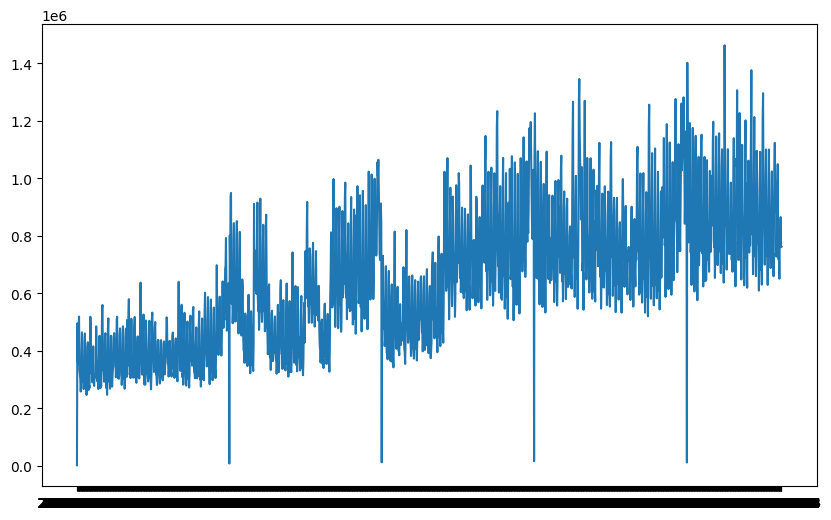

In [51]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Charger les données de vente et les jours fériés (si nécessaire)
# df_group_sales = pd.read_csv('votre_chemin_vers_df_group_sales.csv')
# df_holi = pd.read_csv('votre_chemin_vers_df_holi.csv')

# Préparer les données de vente pour Prophet
df_group_sales = df_group_sales.rename(columns={'date': 'ds', 'sales': 'y'})

# Préparer les jours fériés pour Prophet
holidays = df_holi[df_holi['type'] == 'Holiday'][['date', 'description']].rename(columns={'date': 'ds', 'description': 'holiday'})

# Configurer et entraîner le modèle Prophet avec les jours fériés
model = Prophet(holidays=holidays)
model.fit(df_group_sales)

# Faire une prédiction pour une période future (par exemple, 365 jours)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(df_group_sales['ds'], df_group_sales['y'], label='Actual Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='dashed')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs Forecast with Prophet')
plt.legend()
plt.show()
